In [1]:
from qiskit import QuantumCircuit

In [3]:
def df(case: int):
    if case not in [1, 2, 3, 4]:
        raise ValueError("Case must be 1, 2, 3 or 4.")
    f = QuantumCircuit(2)
    if case in [2, 3]:
        f.cx(0, 1)
    if case in [3, 4]:
        f.x(1)
    return f

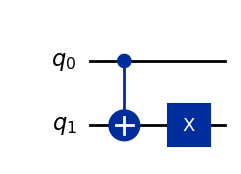

In [4]:
display(df(3).draw(output='mpl'))

In [5]:
def cc(function: QuantumCircuit):
    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)

    qc.x(n)
    qc.h(range(n + 1))
    qc.barrier()
    qc.compose(function, inplace=True)
    qc.barrier()
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc

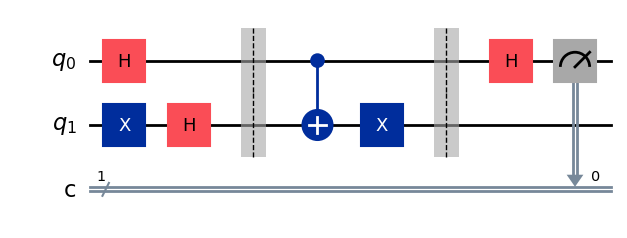

In [6]:
display(cc(df(3)).draw(output='mpl'))

In [7]:
from qiskit_aer import AerSimulator

In [8]:
def da(function: QuantumCircuit):
    qc = cc(function)
    result = AerSimulator().run(qc, shots=1, memory=True).result()
    measurements = result.get_memory()[0]
    if measurements[0] == '0':
        return "constant"
    return "balanced"

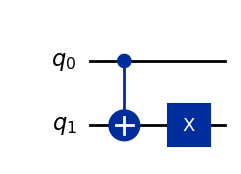

'balanced'

In [9]:
f=df(3)
display(f.draw(output='mpl'))
display(da(f))